In [1]:
# maths for Meia
import math
import random

def lcm(a,b):
    return int(abs(a * b) / math.gcd(a,b) if a and b else 0)

def exfract(a,b):
    gcdab = math.gcd(a, b)
    a /= gcdab
    b /= gcdab
    mult = random.randrange(2, 15)
    return (int(a), int(b), mult, int(a*mult), int(b*mult))

def prdfr(p):
    '''periodic p as fraction'''
    l = len(str(p))
    return (p, 10**l - 1)

def frdec(mxln):
    a = random.randrange(1, mxln)
    b = random.randrange(1, mxln)
    return (a , 10**len(str(a)))

if __name__=="__main__":
    for i in range(3):
        a = random.randrange(2, 20)
        b = random.randrange(2, 20)
        print('fraction ', exfract(a, b))
    for i in range(2):
        a, b = prdfr(random.randrange(1, 300))
        print(a, '/', b, '=', a/b)
    for i in range(2):
        a, b = frdec(1000)
        print(a, b, a/b)
    for i in range(2):
        a = random.randrange(2, 20)
        b = random.randrange(2, 20)
        print(a, '/', b, a/b)
        
    a = random.randrange(2, 20)
    b = random.randrange(2, 10)
    c = random.randrange(1, 10)
    p = random.randrange(1, 3)
    d = c + a/b/10**p
    print(d, '=', c, '+', a, '/', b, '/', 10**p)

fraction  (1, 6, 3, 3, 18)
fraction  (11, 13, 4, 44, 52)
fraction  (1, 2, 13, 13, 26)
102 / 999 = 0.1021021021021021
107 / 999 = 0.10710710710710711
730 1000 0.73
43 100 0.43
13 / 11 1.1818181818181819
7 / 15 0.4666666666666667
6.15 = 6 + 6 / 4 / 10


In [2]:
# https://stackoverflow.com/questions/65480162/how-to-remove-repititve-pattern-from-an-image-using-fft

from skimage.io import imread, imsave
from matplotlib import pyplot as plt
import numpy as np
import cv2

img = imread('skin.jpg')

R = img[...,2]
G = img[...,1]
B = img[...,0]

f1 = np.fft.fft2(R)
fshift1 = np.fft.fftshift(f1)
phase_spectrumR = np.angle(fshift1)
magnitude_spectrumR = 20*np.log(np.abs(fshift1))

f2 = np.fft.fft2(G)
fshift2 = np.fft.fftshift(f2)
phase_spectrumG = np.angle(fshift2)
magnitude_spectrumG = 20*np.log(np.abs(fshift2))

f3 = np.fft.fft2(B)
fshift3 = np.fft.fftshift(f3)
phase_spectrumB = np.angle(fshift3)
magnitude_spectrumB = 20*np.log(np.abs(fshift2))

#===============================
# LPF # HPF
magR = np.zeros_like(R) #  = fshift1 # 
magR[magR.shape[0]//4:3*magR.shape[0]//4,
 magR.shape[1]//4:3*magR.shape[1]//4] = np.abs(fshift1[magR.shape[0]//4:3*magR.shape[0]//4,
  magR.shape[1]//4:3*magR.shape[1]//4]) # =0 #

rows = img.shape[0]
cols = img.shape[1]
crow, ccol = int(rows / 2), int(cols / 2)  # center

# Circular HPF mask, center circle is 0, remaining all ones
#mask = np.ones((rows, cols, 2), np.uint8)
mask = np.ones((rows, cols), np.uint8)
r = 30
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r*r # circular
#mask_area = abs((x - center[0]) + y * 0.)  <= r # directional x
#mask_area = abs(x * 0. + (y - center[1]))  <= r # directional y
mask[mask_area] = 0

bsf = scipy.signal.firwin(61, [1/12 - 0.03, 1/12 + 0.03], pass_zero='bandstop', fs=1)
scipy.ndimage.convolve1d(image, bsf, axis=0)

# apply mask and inverse DFT
#print(magR.shape, mask.shape)
fshift = magR * mask

#fshift_mask_mag = 1000 * np.log(cv2.magnitude(fshift[:, :, 0], fshift[:, :, 1]))
fshift_mask_mag = 1000 * np.log(cv2.magnitude(fshift[:, :], fshift[:, :]))
resR = np.abs(np.fft.ifft2(np.fft.ifftshift(fshift_mask_mag)))

#resR = np.abs(np.fft.ifft2(np.fft.ifftshift(magR)))
resR = R - resR
#===============================
magnitude_spectrumR
plt.subplot(221)
plt.imshow(R, cmap='gray')
plt.title('Original')

plt.subplot(222)
plt.imshow(magnitude_spectrumR, cmap='gray')
plt.title('Magnitude Spectrum')

plt.subplot(223)
plt.imshow(phase_spectrumR, cmap='gray')
plt.title('Phase Spectrum')

plt.subplot(224)
plt.imshow(resR, cmap='gray')
plt.title('Processed')

NameError: name 'scipy' is not defined

In [1]:

import numpy as np
import scipy as sp
import scipy.optimize

capital = 150000
periods = 180
interest = 0.035
growth = 0.03

def calc_payment(x):
    ini = x
    x = 0
    for i in range(int(periods/12)):
        increase = ini*(1+growth)**(i)
        x += increase
    return x - capital

def pv_annuity(cap, r, g, t):
    return cap * (r-g) / (1-((1+g)/(1+r))**t)

def pmt_annuity(pay, r, g, t):
    return pay / (r-g) * (1-((1+g)/(1+r))**t)

solution = scipy.optimize.minimize(calc_payment,x0=100)

print(solution)
print(180/12)

print(pv_annuity(capital, interest, growth, periods))
print(pmt_annuity(881.63, interest, growth, periods))

print(0.7*1/(interest+growth))

      fun: -1680992803.7075548
 hess_inv: array([[1]])
      jac: array([-0.])
  message: 'Optimization terminated successfully.'
     nfev: 30
      nit: 1
     njev: 15
   status: 0
  success: True
        x: array([-90373169.85000004])
15.0
1289.2168548432105
102577.38991170967
10.769230769230768


[-0.04   -0.0398 -0.0396 ...  0.9994  0.9996  0.9998]
0.05 0.1


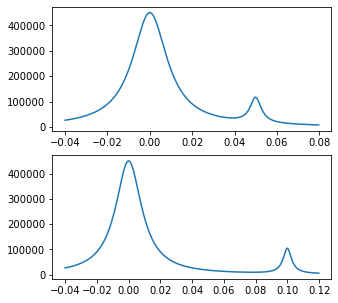

In [38]:
import matplotlib.pyplot as plt
import math
import numpy as np

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(5,5))

# Equation - dispersion relation 
omega_p = 500
k       = 5
u_0     = 5
u_02    = 10
m       = 90
M       = 2
omega   = np.arange(-20, 500, 0.1)
ksi     = omega / omega_p
ksi_0   = k*u_0 / omega_p
ksi_02  = k*u_02 / omega_p

print(ksi)
print(ksi_0, ksi_02)
eps = 0.00001

F       = (m/M) / (ksi**2+eps*10) + 1 / ((ksi-ksi_0)**2+eps)
F2      = (m/M) / (ksi**2+eps*10) + 1 / ((ksi-ksi_02)**2+eps)

# Fig 1
ax1.plot(ksi[:600], F[:600])
# Fig 2
ax2.plot(ksi[:800], F2[:800])
plt.show()

In [50]:

import numpy as np
from scipy import signal

list_of_array = np.array([[1, 1, 1, 0, 0, 0], 
                          [0, 1, 0, 0, 0, 0], 
                          [1, 1, 1, 0, 0, 0], 
                          [0, 0, 2, 4, 4, 0], 
                          [0, 0, 0, 2, 0, 0], 
                          [0, 0, 1, 2, 4, 0]])

hrg_krnl = np.array([[1, 1, 1],
                     [0, 1, 0],
                     [1, 1, 1]])

'''summary = 0 # variable for calculating sum
list_max = [] # list that i can store my all possible sums

for i in range(len(list_of_array)):
    for j in range(len(list_of_array[i])):
        if i<4 and j<4:
            summary = list_of_array[i][j]+list_of_array[i][j+1]+list_of_array[i][j+2]+list_of_array[i+1][j+1]+list_of_array[i+2][j]+list_of_array[i+2][j+1]+list_of_array[i+2][j+2]
            list_max.append(summary)
            summary = 0

list_max.sort(reverse = True)
print(list_max)
print(list_max[0])'''

grad = signal.convolve2d(list_of_array, hrg_krnl, boundary='fill', fillvalue=0, mode='same')    
print(grad)
hrxy = np.where(grad > 6)
print(hrxy[0][1])
print([grad[hrxy[0][i], hrxy[1][i]] for i in range(len(hrxy[0]))])

[[ 2  2  2  0  0  0]
 [ 4  7  4  2  0  0]
 [ 2  4  8 10  8  4]
 [ 2  3  6  7  6  0]
 [ 0  3  9 19 14  8]
 [ 0  0  3  4  6  0]]
2
[7, 8, 10, 8, 7, 9, 19, 14, 8]
